**Name:** Arch Jignesh Desai

**Email Id:** archdesai.ad@gmail.com

## Question 2: Regression

### Set up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
root = "C:/Users/archd/Downloads/"

df = pd.read_csv(root + "Adops & Data Scientist Sample Data - Q2 Regression.csv", header = None, names = ['A', 'B', 'C'])
df.head()

,A,B,C
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


In [3]:
df.shape

(300, 3)

Checking if any null values

In [4]:
df.isnull().any().any()

False

### EDA and Data Preparation

Let's visualize data first

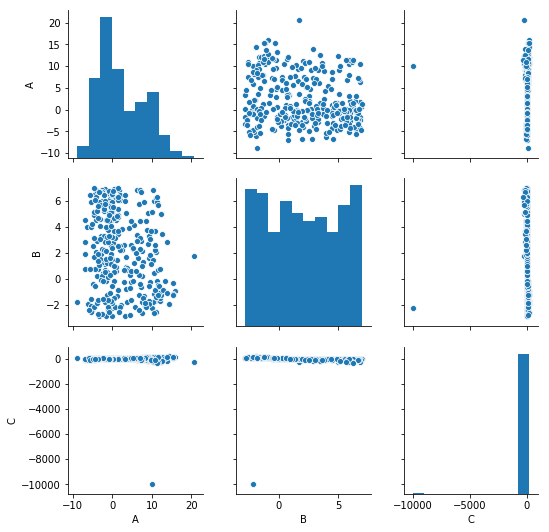

In [5]:
sns.pairplot(df)

As we see we have obvious outliers and we need to remove them as regression models are sensitive to them and might throw the model off.

Removing outliers

In [6]:
df[df.C < -5000]

,A,B,C
200,10.1,-2.24,-10000.0


In [7]:
df[df.A > 20]

,A,B,C
209,20.6,1.74,-248.0


In [8]:
df.drop([200, 209], inplace = True)
df.shape

(298, 3)

Again Visualizing data

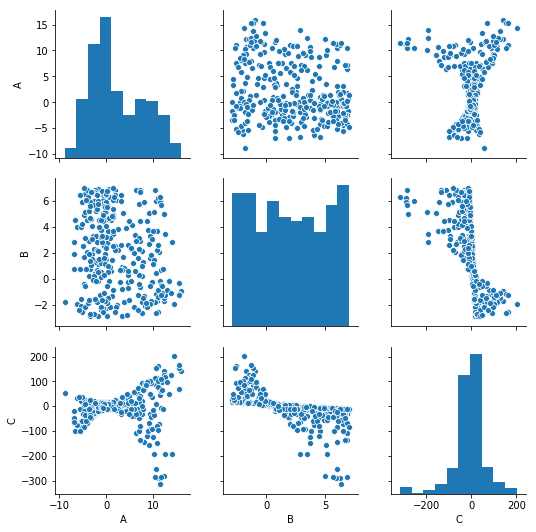

In [9]:
sns.pairplot(df)

We can see funnel shape in scatterplots between independent variables A/B and dependent variable C.

Checking values of variables.

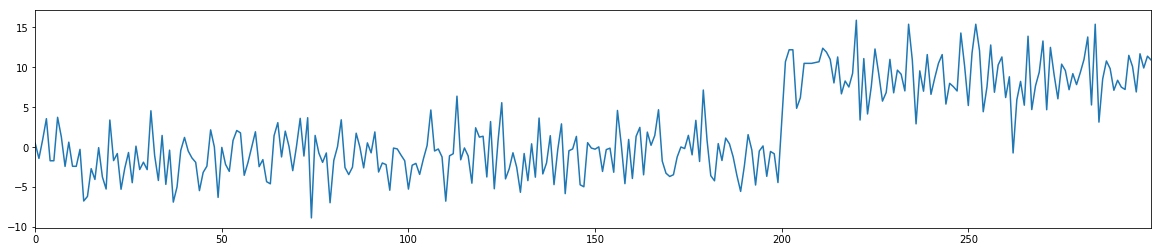

In [10]:
fig, ax = plt.subplots(figsize = (20, 4))
df.A.plot(kind = 'line', ax = ax)

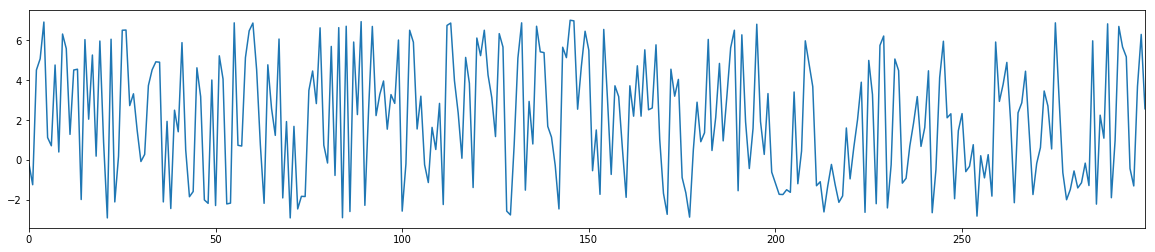

In [11]:
fig, ax = plt.subplots(figsize = (20, 4))
df.B.plot(kind = 'line', ax = ax)

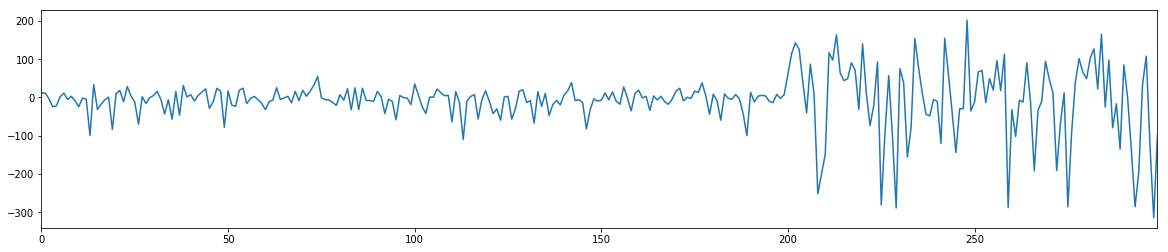

In [12]:
fig, ax = plt.subplots(figsize = (20, 4))
df.C.plot(kind = 'line', ax = ax)

We do not have any information about the type of the data. But, there is a mean shift after 200 data point and the variability also increases after that. Since we do not know if this is a time series data, I cannot separate them and do analysis.

One thing to note is there is higher variability in C when the value of A is high. Adding various features and checking their correlations with C. Also, we have negative values in the data frame. So for log transformations, I shifted those values by adding (absolute minimum values + 0.01) to avoid 0 in log transformation. 

In [13]:
temp_df = df.copy()
temp_df['AB'] = temp_df.A*temp_df.B
temp_df['A2'] = temp_df.A*temp_df.A
temp_df['B2'] = temp_df.B*temp_df.B
temp_df['C2'] = temp_df.C*temp_df.C
temp_df['AB2'] = temp_df.A*temp_df.B*temp_df.B
temp_df['A2B'] = temp_df.A*temp_df.A*temp_df.B
temp_df['logA'] = np.log(temp_df.A + np.abs(temp_df.A.min()) + 0.01)
temp_df['logB'] = np.log(temp_df.B + np.abs(temp_df.B.min()) + 0.01)
temp_df['logC'] = np.log(temp_df.C + np.abs(temp_df.C.min()) + 0.01)
temp_df['sqrtA'] = np.sqrt(temp_df.A + np.abs(temp_df.A.min()))
temp_df['sqrtB'] = np.sqrt(temp_df.B + np.abs(temp_df.B.min()))
temp_df['sqrtC'] = np.sqrt(temp_df.C + np.abs(temp_df.C.min()))

In [14]:
temp_df.corr()

,A,B,C,AB,A2,B2,C2,AB2,A2B,logA,logB,logC,sqrtA,sqrtB,sqrtC
A,1.000000,-0.189354,0.048752,0.362308,0.805477,-0.183467,0.481375,0.573804,0.144825,0.835777,-0.089327,-0.148043,0.986067,-0.161689,-0.064988
B,-0.189354,1.000000,-0.631745,0.209851,-0.221077,0.852096,0.146438,0.088957,0.506809,-0.085887,0.846404,-0.317644,-0.163129,0.978224,-0.553518
C,0.048752,-0.631745,1.000000,-0.680272,0.042194,-0.500803,-0.543891,-0.485052,-0.975718,0.029838,-0.514944,0.680069,0.050451,-0.618648,0.969945
AB,0.362308,0.209851,-0.680272,1.000000,0.185503,0.133724,0.546806,0.855266,0.761443,0.290214,0.175362,-0.546016,0.368433,0.211881,-0.707557
A2,0.805477,-0.221077,0.042194,0.185503,1.000000,-0.193509,0.568020,0.378103,0.123015,0.482411,-0.115263,-0.170570,0.708615,-0.195319,-0.084507
B2,-0.183467,0.852096,-0.500803,0.133724,-0.193509,1.000000,0.223767,0.096175,0.387592,-0.102894,0.525976,-0.304218,-0.163910,0.737433,-0.466197
C2,0.481375,0.146438,-0.543891,0.546806,0.568020,0.223767,1.000000,0.728309,0.643598,0.315248,0.076052,-0.721965,0.432161,0.113420,-0.711085
AB2,0.573804,0.088957,-0.485052,0.855266,0.378103,0.096175,0.728309,1.000000,0.604617,0.482267,0.063142,-0.547872,0.576537,0.079545,-0.590060
A2B,0.144825,0.506809,-0.975718,0.761443,0.123015,0.387592,0.643598,0.604617,1.000000,0.122719,0.420096,-0.708596,0.136994,0.500598,-0.973284
logA,0.835777,-0.085887,0.029838,0.290214,0.482411,-0.102894,0.315248,0.482267,0.122719,1.000000,-0.025476,-0.101686,0.905860,-0.065330,-0.045885


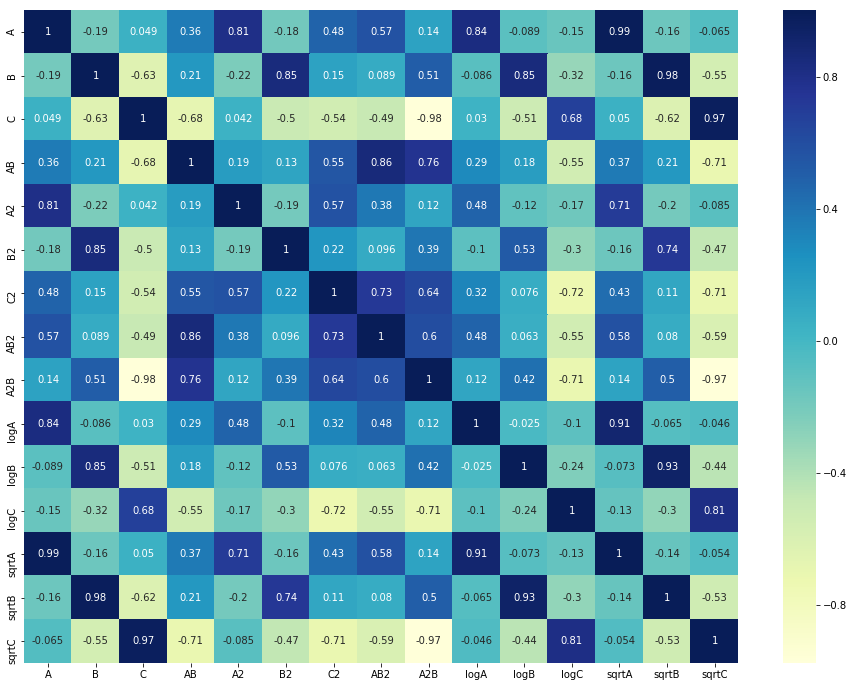

In [15]:
fig, ax = plt.subplots(figsize = (16,12))
sns.heatmap(temp_df.corr(), cmap="YlGnBu", annot=True)

From above correlation plot, we can see that the correlation between C and A2B is highest which is -0.98. Let me plot them and see.

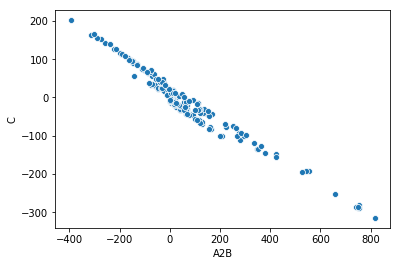

In [16]:
sns.scatterplot(x = temp_df.A2B, y = temp_df.C)

#### THIS IS BEAUTIFUL. BAM!!

Feature engineering is always must.

Preparing data for model building.

In [17]:
df['A2B'] = df.A*df.A*df.B
df.drop(['A', 'B'], axis = 1, inplace = True)
df.head()

,C,A2B
0,11.50,-0.043218
1,11.80,-2.445363
2,-3.24,4.010513
3,-23.90,64.616643
4,-22.10,19.969900


Checking again

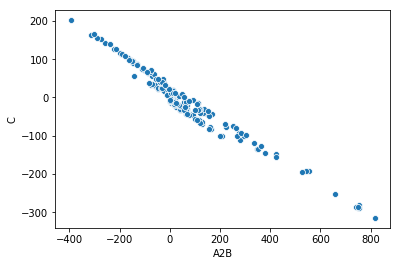

In [18]:
sns.scatterplot(x = df.A2B, y = df.C)

### Linear Regression Model Analytically

**Equations**

Let,

X . theta = y

X' . X . theta = X'.y

[(X'.X)^-1] . (X'.X) . theta = [(X'.X)^-1] . X' . y

theta = [(X'.X)^-1] . X' .y

In [19]:
X = df.A2B.values
y = df.C.values

Since we do not have constant term, I am adding it in X.

In [20]:
X_b = np.c_[np.ones((len(X),1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[ 9.09753599 -0.41835837]


Predicting Y using theta found above

In [21]:
y_predict = X_b.dot(theta_best)

Plotting

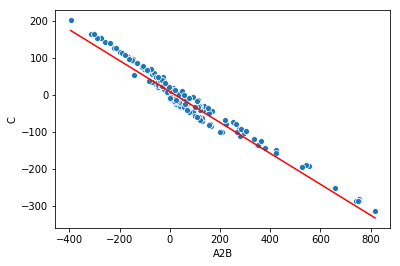

In [22]:
fig, ax = plt.subplots()
sns.scatterplot(x = df.A2B, y = df.C, ax = ax)
sns.lineplot(x = df.A2B, y = y_predict, ax=ax, color = "red")

### Model Evaluation

#### RMSE

In [23]:
rmse = np.sqrt(np.mean((y - y_predict)**2))
rmse

15.321543174985308

#### R-squared

In [24]:
mean_y = np.mean(y)
sst = np.sum((y - mean_y) ** 2)
sse = np.sum((y - y_predict) ** 2)
r2 = 1 - (sse / sst)
r2

0.9520262138512181